In [1]:
!sudo apt-get install megatools -q
!megadl "https://mega.nz/file/vYl3BAbJ#s_KIE6Wom_X1bOiLVB4AZr8ad9vZxElZ82UVYG6U7GU" --path="/content/file.blend"

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  megatools
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 207 kB of archives.
After this operation, 898 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 megatools amd64 1.10.3-1build1 [207 kB]
Fetched 207 kB in 1s (169 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package megatools.
(Reading database ... 126308 files and directories currently ins

In [2]:
# @title Setup and Blender Installation { display-mode: "form" }
import os
import sys
import subprocess
import time
from google.colab import files
from IPython.display import display, Image

# --- Parameters ---
# Choose a Blender version (check blender.org/download/lts/ for stable LTS versions)
# Or find latest releases at blender.org/download/
BLENDER_VERSION = "4.1.1" # Example: Use a recent stable version
BLENDER_MAJOR_MINOR = ".".join(BLENDER_VERSION.split(".")[:2]) # e.g., "4.1"

# --- Check GPU ---
print("Checking GPU availability...")
try:
    gpu_info = subprocess.check_output(['nvidia-smi', '--query-gpu=name', '--format=csv,noheader'])
    gpu_name = gpu_info.decode('ascii').strip()
    print(f"GPU detected: {gpu_name}")
    if "T4" not in gpu_name:
        print("Warning: GPU is not a Tesla T4, but proceeding anyway.")
except FileNotFoundError:
    print("Error: nvidia-smi command not found. Is GPU runtime enabled?")
    print("Ensure you have selected Runtime -> Change runtime type -> Hardware accelerator -> T4 GPU")
    sys.exit("GPU not available.")
except Exception as e:
    print(f"Error checking GPU: {e}")
    sys.exit("GPU check failed.")

# --- Download and Extract Blender ---
blender_folder_name = f"blender-{BLENDER_VERSION}-linux-x64"
blender_archive_name = f"{blender_folder_name}.tar.xz"
blender_download_url = f"https://download.blender.org/release/Blender{BLENDER_MAJOR_MINOR}/{blender_archive_name}"
blender_executable_path = os.path.join(blender_folder_name, "blender")
blender_install_dir = "/content/blender" # Installation directory

if not os.path.exists(blender_executable_path):
    print(f"Downloading Blender {BLENDER_VERSION}...")
    # Use aria2c for potentially faster downloads (install if needed)
    try:
      subprocess.run(['apt-get', 'update'], check=True, capture_output=True)
      subprocess.run(['apt-get', 'install', '-y', 'aria2'], check=True, capture_output=True)
      download_cmd = ['aria2c', '-x', '16', '-s', '16', '-k', '1M', blender_download_url]
      print("Using aria2c for download.")
    except Exception:
      print("aria2c not available or failed to install, using wget.")
      download_cmd = ['wget', blender_download_url]

    subprocess.run(download_cmd, check=True)

    print("Extracting Blender...")
    # Using tar command for extraction
    subprocess.run(['tar', '-xf', blender_archive_name], check=True)
    print("Blender extracted.")

    # Optional: Move to a cleaner path (avoids long names in commands)
    # if os.path.exists(blender_install_dir):
    #    subprocess.run(['rm', '-rf', blender_install_dir])
    # subprocess.run(['mv', blender_folder_name, blender_install_dir])
    # blender_executable_path = os.path.join(blender_install_dir, "blender")
    # print(f"Blender moved to {blender_install_dir}")


else:
    print("Blender already downloaded and extracted.")

print(f"Blender executable path: {blender_executable_path}")
# Verify execution permission
subprocess.run(['chmod', '+x', blender_executable_path], check=True)

# --- Check Blender Version ---
try:
    blender_version_output = subprocess.run([f'./{blender_executable_path}', '--version'], capture_output=True, text=True, check=True)
    print("\n--- Blender Version Check ---")
    print(blender_version_output.stdout)
    print("---------------------------\n")
except subprocess.CalledProcessError as e:
    print(f"Error running Blender version check: {e}")
    print(f"Stderr: {e.stderr}")
    sys.exit("Blender execution failed.")
except FileNotFoundError:
    print(f"Error: Blender executable not found at {blender_executable_path}")
    sys.exit("Blender executable missing.")

print("Setup complete.")

Checking GPU availability...
GPU detected: Tesla T4
Using aria2c for download.
Extracting Blender...
Blender extracted.
Blender executable path: blender-4.1.1-linux-x64/blender

--- Blender Version Check ---
Blender 4.1.1
	build date: 2024-04-15
	build time: 23:47:45
	build commit date: 2024-04-15
	build commit time: 15:11
	build hash: e1743a0317bc
	build platform: Linux
	build type: Release
	build c flags:  -Wall -Werror=implicit-function-declaration -Wstrict-prototypes -Werror=return-type -Werror=vla -Wmissing-prototypes -Wno-char-subscripts -Wno-unknown-pragmas -Wpointer-arith -Wunused-parameter -Wwrite-strings -Wlogical-op -Wundef -Winit-self -Wmissing-include-dirs -Wno-div-by-zero -Wtype-limits -Wformat-signedness -Wrestrict -Wno-stringop-overread -Wno-stringop-overflow -Wnonnull -Wabsolute-value -Wuninitialized -Wredundant-decls -Wshadow -Wimplicit-fallthrough=5 -Wno-error=unused-but-set-variable  -std=gnu11 -msse -pipe -fPIC -funsigned-char -fno-strict-aliasing -ffp-contract=off

In [4]:
# @title Specify and Verify Existing .blend File { display-mode: "form" }

import os

# --- Define the path to your existing .blend file ---
# Modify this string if your file is located elsewhere in the Colab environment
blend_file_path = "/content/file.blend"

print(f"INFO: Attempting to use specified .blend file: {blend_file_path}")

# --- Verify that the file exists at the specified path ---
if os.path.exists(blend_file_path):
    # If the file exists, print a success message.
    # The variable 'blend_file_path' now holds the valid path and can be used by the next cell.
    print(f"SUCCESS: Found file at '{blend_file_path}'.")
    print("You can now proceed to run the next cell (Configure Render Settings and Generate Preview).")
else:
    # If the file does not exist, print an error message and instructions.
    print(f"\nERROR: File not found at the specified path '{blend_file_path}'.")
    print("Please ensure that 'file.blend' exists in the '/content/' directory.")
    print("---------------------------------------------------------------------")
    print("How to fix:")
    print("1. Check the spelling and exact path: Is it '/content/file.blend'?")
    print("2. Upload the file: Use the file browser panel on the left side of Colab (folder icon).")
    print("   - Click the 'Upload' button (upward arrow icon) and select your 'file.blend'.")
    print("   - Wait for the upload to complete.")
    print("3. Re-run this cell after uploading or correcting the path.")
    print("---------------------------------------------------------------------")

    # Set blend_file_path to None. The next code cell checks this variable,
    # preventing it from attempting to render a non-existent file.
    blend_file_path = None

# Optional: You can uncomment the line below to list files in /content/ for debugging
# print("\nFiles currently in /content/:", os.listdir('/content/'))

INFO: Attempting to use specified .blend file: /content/file.blend
SUCCESS: Found file at '/content/file.blend'.
You can now proceed to run the next cell (Configure Render Settings and Generate Preview).


Render script saved to /content/render_script.py

--- Running Blender ---
Command: ./blender-4.1.1-linux-x64/blender -b /content/file.blend -P /content/render_script.py -- /content/renders/file_preview.png CYCLES 1280 720 64 1000
--- Blender Output ---
Blender 4.1.1 (hash e1743a0317bc built 2024-04-15 23:47:45)
Read blend: "/content/file.blend"
Fra:0 Mem:434.54M (Peak 444.64M) | Time:00:00.23 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Cloth
Fra:0 Mem:436.94M (Peak 444.64M) | Time:00:00.24 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | eye_R
Fra:0 Mem:437.00M (Peak 444.64M) | Time:00:00.24 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | eye_L
Fra:0 Mem:437.05M (Peak 444.64M) | Time:00:00.24 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | eyelash
Fra:0 Mem:437.07M (Peak 444.64M) | Time:00:00.24 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Tongue
Fra:0 Mem:439.11M (Peak 444.64M) | 

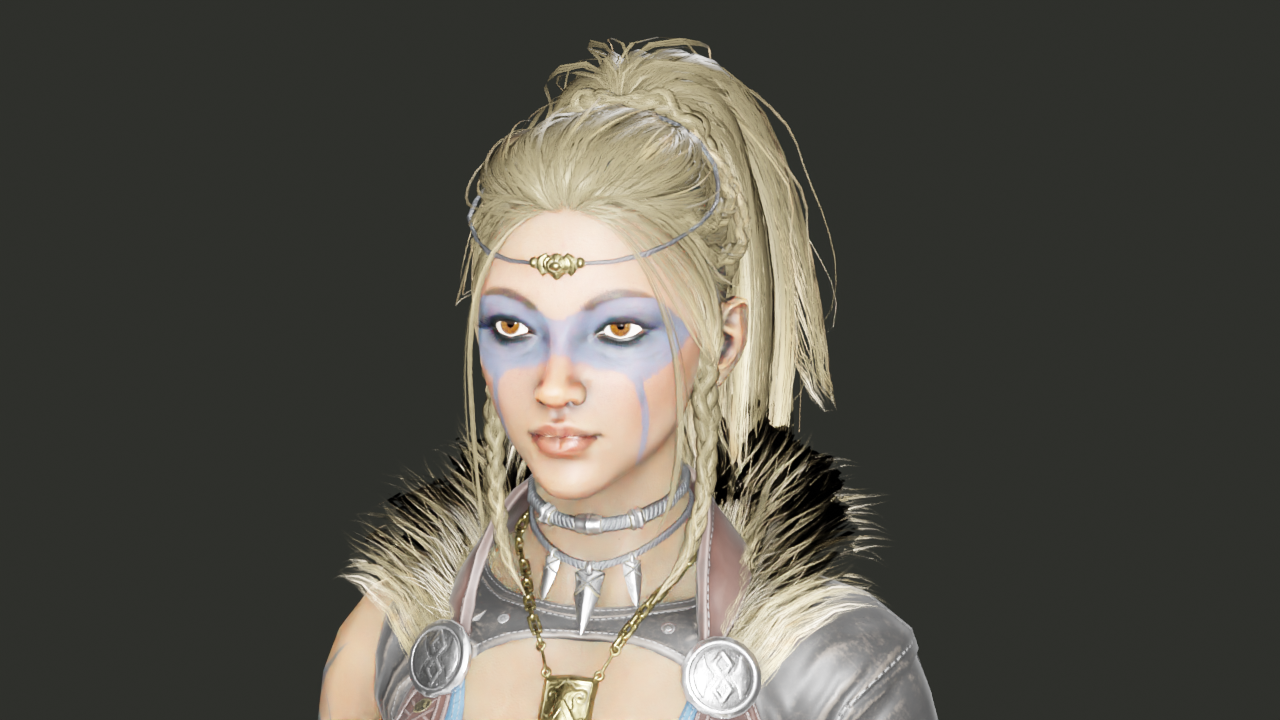

In [7]:
# @title Configure Render Settings and Generate Preview

if not blend_file_path or not os.path.exists(blend_file_path):
    print("Error: No .blend file specified or found. Please run the previous cell first.")
else:
    # --- Render Configuration ---
    output_dir = "/content/renders"
    os.makedirs(output_dir, exist_ok=True)

    # Construct output file path (using blend file name)
    blend_filename_base = os.path.splitext(os.path.basename(blend_file_path))[0]
    output_filename = f"{blend_filename_base}_preview.png" # Change format if needed (JPEG, etc.)
    output_filepath = os.path.join(output_dir, output_filename)

    render_engine = "CYCLES" # Options: "CYCLES", "BLENDER_EEVEE", "BLENDER_WORKBENCH"
    resolution_x = 1280       # Preview width
    resolution_y = 720       # Preview height
    samples = 64            # Reduce for faster previews (Cycles only)
    use_gpu = True          # Use the T4 GPU

    # <<< NEW: Light Configuration >>>
    add_light = True         # Set to False to disable adding the light
    light_energy = 1000      # Adjust brightness. Units depend on engine (Cycles: Watts-ish, Eevee: unitless)
                              # Good starting points: Cycles ~500-2000, Eevee ~10-100

    # --- Create the Blender Python Script ---
    render_script_content = f"""
import bpy
import sys
import os
import mathutils # Needed for camera/light positioning
import math      # Needed for camera rotation

print("Executing Blender Python script...")

# --- Get arguments passed from Colab ---
args = sys.argv
try:
    arg_start_index = args.index('--') + 1
    script_args = args[arg_start_index:]
except ValueError:
    script_args = []

if len(script_args) < 6: # Increased count for light energy
    print("Error: Not enough arguments passed to the script.")
    print("Expected: output_path, engine, res_x, res_y, samples, light_energy")
    sys.exit(1)

output_path = script_args[0]
engine = script_args[1]
res_x = int(script_args[2])
res_y = int(script_args[3])
render_samples = int(script_args[4])
add_light_flag = {add_light} # Passed directly from Colab context
light_power = float(script_args[5]) # Passed from Colab

use_gpu_flag = {use_gpu}

# --- Configure Scene ---
scene = bpy.context.scene
active_camera = None # Variable to hold the camera we end up using

# --- Camera Check and Creation ---
if not scene.camera:
    print("No active camera found in the scene. Attempting to add one.")
    existing_cameras = [obj for obj in bpy.data.objects if obj.type == 'CAMERA']

    if existing_cameras:
        first_camera = existing_cameras[0]
        camera_names = [cam.name for cam in existing_cameras]
        print(f"Found existing camera(s): {{camera_names}}. Setting '{{first_camera.name}}' as active.")
        scene.camera = first_camera
        active_camera = first_camera
    else:
        print("No camera objects exist. Creating a new default camera using bpy.data.")
        try:
            cam_data = bpy.data.cameras.new(name="AddedCameraData")
            cam_obj = bpy.data.objects.new(name="AddedCamera", object_data=cam_data)
            cam_obj.location = mathutils.Vector((7.0, -7.0, 5.0))
            cam_obj.rotation_euler = (math.radians(60), math.radians(0), math.radians(45))
            scene.collection.objects.link(cam_obj)
            scene.camera = cam_obj
            active_camera = cam_obj
            print(f"Added and activated new camera: '{{cam_obj.name}}'")
        except Exception as e_cam:
            print(f"Error adding camera using bpy.data: {{e_cam}}")
            sys.exit(1)
else:
    active_camera = scene.camera # Store the existing active camera
    print(f"Active camera found: '{{active_camera.name}}'")

# Ensure we have identified an active camera before proceeding
if not active_camera:
     print("Error: Could not determine active camera.")
     sys.exit(1)

# --- Add Light Source (if enabled) ---
if add_light_flag:
    print(f"Adding a Point light at the camera position with energy: {{light_power}}")
    try:
        # 1. Create light datablock
        light_data = bpy.data.lights.new(name="AddedLightData", type='POINT')
        light_data.energy = light_power # Set energy/power

        # 2. Create light object
        light_obj = bpy.data.objects.new(name="AddedPointLight", object_data=light_data)

        # 3. Position the light exactly at the camera's location
        light_obj.location = active_camera.location

        # 4. Link object to scene collection
        scene.collection.objects.link(light_obj)
        print(f"Added light '{{light_obj.name}}' at location {{active_camera.location}}")

    except Exception as e_light:
        print(f"Error adding light source: {{e_light}}")
        # Continue without the light if adding fails? Or exit? Let's just warn for now.
        print("Warning: Proceeding without the added light.")


# Set Render Engine
scene.render.engine = engine
print(f"Set render engine to: {{engine}}")

# Set Output Path and Format
scene.render.filepath = output_path
scene.render.image_settings.file_format = 'PNG'
print(f"Set output path to: {{output_path}}")

# Set Resolution
scene.render.resolution_x = res_x
scene.render.resolution_y = res_y
scene.render.resolution_percentage = 100
print(f"Set resolution to: {{res_x}}x{{res_y}}")

# --- GPU Configuration ---
if use_gpu_flag and engine == 'CYCLES':
    print("Configuring Cycles for GPU rendering...")
    scene.cycles.device = 'GPU'
    prefs = bpy.context.preferences.addons['cycles'].preferences
    prefs.compute_device_type = 'CUDA'
    try:
        prefs.get_devices()
        print(f"Available devices: {{[d.name for d in prefs.devices]}}")
        activated_gpu = False
        for device in prefs.devices:
            if device.type == 'CUDA':
                device.use = True
                print(f"Enabled CUDA device: {{device.name}}")
                activated_gpu = True
            else:
                device.use = False
        if not activated_gpu:
            print("Warning: No CUDA device found/activated. Falling back to CPU.")
            scene.cycles.device = 'CPU'
        else:
            print("Cycles GPU rendering configured.")
    except Exception as e:
        print(f"Error configuring GPU devices: {{e}}. Falling back to CPU.")
        scene.cycles.device = 'CPU'
    scene.cycles.samples = render_samples
    print(f"Set Cycles samples to: {{render_samples}}")

elif use_gpu_flag and engine == 'BLENDER_EEVEE':
    scene.eevee.taa_render_samples = render_samples
    print(f"Set Eevee samples to: {{render_samples}}")
    print("Eevee rendering configured (uses GPU by default).")


# --- Render ---
print("\\nStarting render...")
try:
    bpy.context.view_layer.update()
    bpy.ops.render.render(write_still=True)
    print(f"Render finished successfully!")
except Exception as e:
    print(f"Error during rendering: {{e}}")
    sys.exit(1)

print("Blender script finished.")
"""

    # --- Write the script to a file ---
    script_path = "/content/render_script.py"
    with open(script_path, "w") as f:
        f.write(render_script_content)
    print(f"Render script saved to {script_path}")

    # --- Build the Blender Command ---
    # <<< Add light_energy to the command arguments >>>
    command = [
        f'./{blender_executable_path}',
        '-b', blend_file_path,
        '-P', script_path,
        '--',
        output_filepath,
        render_engine,
        str(resolution_x),
        str(resolution_y),
        str(samples),
        str(light_energy) # Add the light energy value here
    ]

    # --- Execute Blender ---
    print("\n--- Running Blender ---")
    print(f"Command: {' '.join(command)}")
    start_time = time.time()
    try:
        render_process = subprocess.run(command, capture_output=True, text=True, check=True)
        end_time = time.time()
        print("--- Blender Output ---")
        print(render_process.stdout)
        print("----------------------")
        print(f"Blender executed successfully in {end_time - start_time:.2f} seconds.")

        # --- Display the result ---
        if os.path.exists(output_filepath):
            print(f"\nPreview saved to: {output_filepath}")
            display(Image(filename=output_filepath))
        else:
            print(f"Error: Output file '{output_filepath}' not found after rendering.")
            print("--- Blender Error Output (if any) ---")
            print(render_process.stderr)
            print("------------------------------------")

    except subprocess.CalledProcessError as e:
        end_time = time.time()
        print(f"\n--- Blender Error ---")
        print(f"Blender process failed after {end_time - start_time:.2f} seconds with exit code {e.returncode}")
        print("--- Stdout ---")
        print(e.stdout)
        print("--- Stderr ---")
        print(e.stderr)
        print("-------------------")
    except Exception as e:
         print(f"\nAn unexpected error occurred: {e}")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Fra:0 Mem:2557.44M (Peak 3060.35M) | Time:00:11.55 | Mem:2112.99M, Peak:2177.71M | Scene, ViewLayer | Updating Lookup Tables
Fra:0 Mem:2557.44M (Peak 3060.35M) | Time:00:11.55 | Mem:2113.07M, Peak:2177.71M | Scene, ViewLayer | Updating Lights
Fra:0 Mem:2557.44M (Peak 3060.35M) | Time:00:11.55 | Mem:2113.07M, Peak:2177.71M | Scene, ViewLayer | Updating Lights | Computing distribution
Fra:0 Mem:2557.44M (Peak 3060.35M) | Time:00:11.55 | Mem:2113.07M, Peak:2177.71M | Scene, ViewLayer | Updating Integrator
Fra:0 Mem:2558.44M (Peak 3060.35M) | Time:00:11.55 | Mem:2114.07M, Peak:2177.71M | Scene, ViewLayer | Updating Film
Fra:0 Mem:2558.44M (Peak 3060.35M) | Time:00:11.55 | Mem:2113.99M, Peak:2177.71M | Scene, ViewLayer | Updating Lookup Tables
Fra:0 Mem:2558.44M (Peak 3060.35M) | Time:00:11.55 | Mem:2114.07M, Peak:2177.71M | Scene, ViewLayer | Updating Baking
Fra:0 Mem:2558.44M (Peak 3060.35M) | Time:00:11.55 | Me

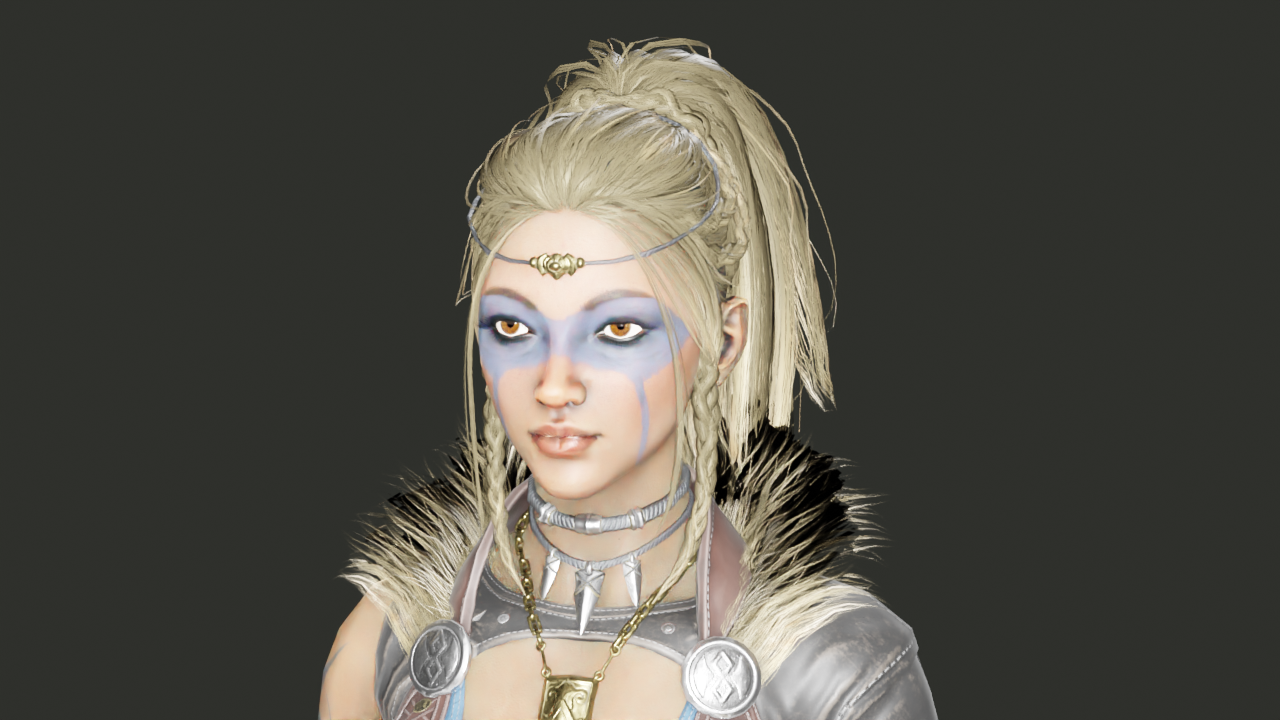

In [9]:
# @title Configure Render Settings and Generate 360° Orbit

import os
import subprocess
import time
import math

if not 'blend_file_path' in locals() or not blend_file_path or not os.path.exists(blend_file_path):
    print("Error: No .blend file specified or found. Please run the previous cell first.")
else:
    # --- Render Configuration ---
    output_dir = "/content/renders"
    os.makedirs(output_dir, exist_ok=True)

    # Base name for the image sequence
    blend_filename_base = os.path.splitext(os.path.basename(blend_file_path))[0]
    output_filename_base = f"{blend_filename_base}_frame"

    render_engine = "CYCLES" # Options: "CYCLES", "BLENDER_EEVEE", "BLENDER_WORKBENCH"
    resolution_x = 1280
    resolution_y = 720
    samples = 64             # Reduce for faster renders (Cycles/Eevee)
    use_gpu = True           # Use the T4 GPU

    add_light = True
    light_energy = 1000

    # --- NEW: Orbit Configuration ---
    total_frames = 360       # Number of images to render
    orbit_center = (0, 0, 0) # Center point for the camera orbit (X, Y, Z)

    # --- Create the Blender Python Script ---
    # This script will now contain the loop to rotate the camera and render each frame.
    render_script_content = f"""
import bpy
import sys
import os
import mathutils
import math

print("Executing Blender Python script for orbital rendering...")

# --- Get arguments passed from Colab ---
args = sys.argv
try:
    arg_start_index = args.index('--') + 1
    script_args = args[arg_start_index:]
except ValueError:
    script_args = []

if len(script_args) < 8:
    print("Error: Not enough arguments passed to the script.")
    print("Expected: output_dir, file_base, engine, res_x, res_y, samples, light_energy, total_frames")
    sys.exit(1)

# Parse arguments
output_dir_path = script_args[0]
file_basename = script_args[1]
engine = script_args[2]
res_x = int(script_args[3])
res_y = int(script_args[4])
render_samples = int(script_args[5])
light_power = float(script_args[6])
num_frames = int(script_args[7])

# Flags passed directly from Colab context
add_light_flag = {add_light}
use_gpu_flag = {use_gpu}
orbit_pivot_point = mathutils.Vector({orbit_center})

# --- Configure Scene ---
scene = bpy.context.scene
active_camera = None

# --- Camera Check and Creation ---
if not scene.camera:
    print("No active camera found. Creating a new one.")
    cam_data = bpy.data.cameras.new(name="AddedCameraData")
    cam_obj = bpy.data.objects.new(name="AddedCamera", object_data=cam_data)
    cam_obj.location = mathutils.Vector((7.0, -7.0, 5.0))
    direction = orbit_pivot_point - cam_obj.location
    rot_quat = direction.to_track_quat('-Z', 'Y')
    cam_obj.rotation_euler = rot_quat.to_euler()
    scene.collection.objects.link(cam_obj)
    scene.camera = cam_obj
    active_camera = cam_obj
else:
    active_camera = scene.camera
    print(f"Using existing active camera: '{{active_camera.name}}'")

if not active_camera:
     print("Error: Could not determine active camera.")
     sys.exit(1)

# --- Add Light Source (if enabled) ---
if add_light_flag:
    print(f"Adding a Point light near the camera with energy: {{light_power}}")
    light_data = bpy.data.lights.new(name="AddedLightData", type='POINT')
    light_data.energy = light_power
    light_obj = bpy.data.objects.new(name="AddedPointLight", object_data=light_data)
    light_obj.location = active_camera.location
    scene.collection.objects.link(light_obj)

# --- ORBIT SETUP ---
print(f"Creating orbit pivot at {{orbit_pivot_point}}")
bpy.ops.object.empty_add(type='PLAIN_AXES', location=orbit_pivot_point)
orbit_pivot = bpy.context.active_object
orbit_pivot.name = "OrbitPivot"

print(f"Parenting '{{active_camera.name}}' to '{{orbit_pivot.name}}'")
active_camera.parent = orbit_pivot
if add_light_flag:
    print(f"Parenting '{{light_obj.name}}' to '{{orbit_pivot.name}}'")
    light_obj.parent = orbit_pivot

# --- Set General Render Settings ---
scene.render.engine = engine
scene.render.image_settings.file_format = 'PNG'
scene.render.resolution_x = res_x
scene.render.resolution_y = res_y
scene.render.resolution_percentage = 100

print(f"Engine: {{engine}}, Resolution: {{res_x}}x{{res_y}}")

# --- GPU/Engine Specific Configuration ---
if use_gpu_flag and engine == 'CYCLES':
    print("Configuring Cycles for GPU rendering...")
    scene.cycles.device = 'GPU'
    prefs = bpy.context.preferences.addons['cycles'].preferences
    prefs.compute_device_type = 'CUDA'
    try:
        prefs.get_devices()
        for device in prefs.devices:
            if device.type == 'CUDA': device.use = True
            else: device.use = False
        print(f"Enabled CUDA devices: {{[d.name for d in prefs.devices if d.use]}}")
    except Exception as e:
        print(f"Error configuring GPU devices: {{e}}. Falling back to CPU.")
        scene.cycles.device = 'CPU'
    scene.cycles.samples = render_samples
    print(f"Set Cycles samples to: {{render_samples}}")

elif engine == 'BLENDER_EEVEE':
    scene.eevee.taa_render_samples = render_samples
    print(f"Set Eevee samples to: {{render_samples}}")

# --- MAIN RENDER LOOP ---
print(f"\\nStarting render loop for {{num_frames}} frames...")

for i in range(num_frames):
    angle_degrees = i * (360 / num_frames)
    angle_radians = math.radians(angle_degrees)
    orbit_pivot.rotation_euler[2] = angle_radians

    frame_number_str = str(i).zfill(4)
    scene.render.filepath = os.path.join(output_dir_path, f"{{file_basename}}_{{frame_number_str}}.png")

    # <<< FIX IS HERE >>> The f-string placeholder for angle_degrees now has double curly braces
    # This prevents the Colab notebook from evaluating it and passes it to the Blender script instead.
    print(f"Rendering frame {{i+1}}/{{num_frames}} at {{angle_degrees:.1f}} degrees -> {{scene.render.filepath}}")
    bpy.ops.render.render(write_still=True)

print("\\nBlender script finished successfully.")
"""

    # --- Write the script to a file ---
    script_path = "/content/render_script.py"
    with open(script_path, "w") as f:
        f.write(render_script_content)
    print(f"Render script saved to {script_path}")

    # --- Build the Blender Command ---
    command = [
        f'./{blender_executable_path}',
        '-b', blend_file_path,
        '-P', script_path,
        '--',
        output_dir,
        output_filename_base,
        render_engine,
        str(resolution_x),
        str(resolution_y),
        str(samples),
        str(light_energy),
        str(total_frames)
    ]

    # --- Execute Blender ---
    print("\n--- Running Blender for 360° Orbit ---")
    print(f"Command: {' '.join(command)}")
    start_time = time.time()
    try:
        render_process = subprocess.run(command, capture_output=True, text=True, check=True)
        end_time = time.time()
        print("--- Blender Output ---")
        print(render_process.stdout)
        print("----------------------")
        print(f"Blender finished rendering the sequence in {end_time - start_time:.2f} seconds.")

        # --- Verify the result ---
        rendered_files = sorted([f for f in os.listdir(output_dir) if f.startswith(output_filename_base)])
        if rendered_files:
            print(f"\nSuccessfully generated {len(rendered_files)} images in '{output_dir}'.")
            print("First 5 files:", rendered_files[:5])
            print("Last 5 files:", rendered_files[-5:])

            # Display the first rendered image as a preview
            from IPython.display import display, Image
            first_image_path = os.path.join(output_dir, rendered_files[0])
            print("\nDisplaying the first frame as a preview:")
            display(Image(filename=first_image_path))
        else:
            print(f"Error: No output files found in '{output_dir}'. Check the Blender output above for errors.")
            if render_process.stderr:
                print("--- Blender Error Output ---")
                print(render_process.stderr)
                print("----------------------------")

    except subprocess.CalledProcessError as e:
        end_time = time.time()
        print(f"\n--- Blender Error ---")
        print(f"Blender process failed after {end_time - start_time:.2f} seconds with exit code {e.returncode}")
        print("--- Stdout ---")
        print(e.stdout)
        print("--- Stderr ---")
        print(e.stderr)
        print("-------------------")
    except Exception as e:
         print(f"\nAn unexpected error occurred: {e}")

In [10]:
#@title download renders

import os
import subprocess
from google.colab import files
import time

def compress_renders_folder():

    # Define paths
    source_folder = "/content/renders/"
    output_archive = "/content/renders_compressed.7z"

    # Check if source folder exists
    if not os.path.exists(source_folder):
        print(f"Error: Source folder '{source_folder}' does not exist!")
        return False

    # Check if folder has files
    files_in_folder = os.listdir(source_folder)
    if not files_in_folder:
        print(f"Error: No files found in '{source_folder}'!")
        return False

    print(f"Found {len(files_in_folder)} files in {source_folder}")

    # Install p7zip if not already installed
    print("Installing 7zip...")
    subprocess.run(["apt-get", "update", "-qq"], check=True)
    subprocess.run(["apt-get", "install", "-y", "-qq", "p7zip-full"], check=True)

    # Remove existing archive if it exists
    if os.path.exists(output_archive):
        os.remove(output_archive)
        print("Removed existing archive")

    # Create 7zip archive with maximum compression
    print("Starting compression with maximum settings...")
    print("This may take several minutes for 360 images...")

    start_time = time.time()

    # 7zip command with maximum compression settings:
    # -mx9: maximum compression level
    # -md32m: dictionary size 32MB (good for images)
    # -mfb64: number of fast bytes
    # -ms: solid compression (better for multiple similar files)
    # -mmt: multithreading
    cmd = [
        "7z", "a",           # add to archive
        "-mx9",              # maximum compression level
        "-md32m",            # dictionary size 32MB
        "-mfb64",            # fast bytes
        "-ms",               # solid compression
        "-mmt",              # use multithreading
        output_archive,      # output file
        f"{source_folder}*"  # source files
    ]

    try:
        result = subprocess.run(cmd, capture_output=True, text=True, check=True)

        end_time = time.time()
        compression_time = end_time - start_time

        print(f"Compression completed in {compression_time:.2f} seconds")

        # Get file sizes for compression ratio calculation
        original_size = sum(os.path.getsize(os.path.join(source_folder, f))
                           for f in files_in_folder)
        compressed_size = os.path.getsize(output_archive)

        compression_ratio = (1 - compressed_size / original_size) * 100

        print(f"Original size: {original_size / (1024*1024):.2f} MB")
        print(f"Compressed size: {compressed_size / (1024*1024):.2f} MB")
        print(f"Compression ratio: {compression_ratio:.2f}%")

        # Download the compressed file
        print("Starting download...")
        files.download(output_archive)
        print("Download initiated!")

        return True

    except subprocess.CalledProcessError as e:
        print(f"Error during compression: {e}")
        print(f"stdout: {e.stdout}")
        print(f"stderr: {e.stderr}")
        return False

def list_renders_folder():
    """
    List contents of the renders folder for verification
    """
    source_folder = "/content/renders/"

    if not os.path.exists(source_folder):
        print(f"Folder '{source_folder}' does not exist!")
        return

    files_list = os.listdir(source_folder)

    if not files_list:
        print(f"Folder '{source_folder}' is empty!")
        return

    print(f"Contents of {source_folder}:")
    print(f"Total files: {len(files_list)}")

    # Show first few files and total size
    total_size = 0
    for i, filename in enumerate(files_list[:5]):  # Show first 5 files
        filepath = os.path.join(source_folder, filename)
        if os.path.isfile(filepath):
            size = os.path.getsize(filepath)
            total_size += size
            print(f"  {filename} - {size / (1024*1024):.2f} MB")

    if len(files_list) > 5:
        print(f"  ... and {len(files_list) - 5} more files")

        # Calculate total size for all files
        for filename in files_list[5:]:
            filepath = os.path.join(source_folder, filename)
            if os.path.isfile(filepath):
                total_size += os.path.getsize(filepath)

    print(f"Total size: {total_size / (1024*1024):.2f} MB")

# Run the functions
if __name__ == "__main__":
    print("=== 7zip Compression Tool for Google Colab ===\n")

    # First, list the contents to verify
    print("1. Checking folder contents:")
    list_renders_folder()

    print("\n" + "="*50 + "\n")

    # Then compress and download
    print("2. Starting compression process:")
    success = compress_renders_folder()

    if success:
        print("\n✅ Process completed successfully!")
        print("The compressed file should be downloading now.")
    else:
        print("\n❌ Process failed. Please check the error messages above.")

=== 7zip Compression Tool for Google Colab ===

1. Checking folder contents:
Contents of /content/renders/:
Total files: 361
  file_frame_0084.png - 1.30 MB
  file_frame_0277.png - 1.27 MB
  file_frame_0192.png - 1.27 MB
  file_frame_0189.png - 1.26 MB
  file_frame_0330.png - 1.21 MB
  ... and 356 more files
Total size: 454.40 MB


2. Starting compression process:
Found 361 files in /content/renders/
Installing 7zip...
Starting compression with maximum settings...
This may take several minutes for 360 images...
Compression completed in 136.70 seconds
Original size: 454.40 MB
Compressed size: 448.63 MB
Compression ratio: 1.27%
Starting download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated!

✅ Process completed successfully!
The compressed file should be downloading now.


In [12]:
import cv2
import os
from tqdm import tqdm

# Configuration
image_folder = '/content/renders'
output_video = '/content/output_video_1.mp4'
fps = 12  # 360 frames / 30 seconds = 12 FPS
total_frames = 360  # Frames 0000 to 0359

# Get dimensions from the first frame
first_frame_path = os.path.join(image_folder, 'file_frame_0000.png')
frame = cv2.imread(first_frame_path)
if frame is None:
    raise FileNotFoundError(f"First frame not found: {first_frame_path}")
height, width, _ = frame.shape
frame_size = (width, height)

# Initialize video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video, fourcc, fps, frame_size)

# Generate sorted frame paths numerically
frame_paths = [
    os.path.join(image_folder, f'file_frame_{frame_num:04d}.png')
    for frame_num in range(total_frames)
]

# Write frames to video
for frame_path in tqdm(frame_paths, desc="Creating Video"):
    img = cv2.imread(frame_path)
    if img is None:
        print(f"Warning: Missing frame {frame_path} - skipping")
        continue
    video_writer.write(img)

# Cleanup
video_writer.release()
print(f"\nVideo saved to {output_video}")

Creating Video: 100%|██████████| 360/360 [00:17<00:00, 20.34it/s]


Video saved to /content/output_video_2.mp4


In [13]:
from moviepy.editor import ImageSequenceClip
import os

# Create list of image paths in order
image_files = [f'/content/renders/file_frame_{i:04d}.png' for i in range(360)]

# Create video clip (fps=12 for 30-second duration with 360 frames)
clip = ImageSequenceClip(image_files, fps=12)

# Write the video file
clip.write_videofile('/content/output_video_2.mp4', codec='libx264')

print("Video creation complete!")

  if event.key is 'enter':



Moviepy - Building video /content/output_video.mp4.
Moviepy - Writing video /content/output_video.mp4



Moviepy - Done !
Moviepy - video ready /content/output_video.mp4
Video creation complete!


In [14]:
import cv2
import os
import numpy as np

output_path = '/content/output_video_3.mp4'
fps = 12  # 360 frames / 30 seconds = 12 fps
frame_width = 1280
frame_height = 720

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Process images
for i in range(360):
    # Construct filename
    filename = f'/content/renders/file_frame_{i:04d}.png'

    # Read image
    img = cv2.imread(filename)

    if img is None:
        print(f"Warning: Could not read {filename}")
        continue

    # Write frame to video
    out.write(img)

    # Print progress every 30 frames
    if (i + 1) % 30 == 0:
        print(f"Processed {i + 1}/360 frames")

# Release everything
out.release()
cv2.destroyAllWindows()

print(f"Video saved to: {output_path}")


Processed 30/360 frames
Processed 60/360 frames
Processed 90/360 frames
Processed 120/360 frames
Processed 150/360 frames
Processed 180/360 frames
Processed 210/360 frames
Processed 240/360 frames
Processed 270/360 frames
Processed 300/360 frames
Processed 330/360 frames
Processed 360/360 frames
Video saved to: /content/output_video_3.mp4


In [15]:
import cv2
import os
import glob

# --- Configuration ---
image_folder = '/content/renders/'
output_video_path = '/content/final_video_opencv.mp4'
video_duration = 30
total_frames = 360
width, height = 1280, 720

# --- Calculation ---
fps = total_frames / video_duration

print(f"Image folder: {image_folder}")
print(f"Video will be saved to: {output_video_path}")
print(f"Dimensions: {width}x{height}, FPS: {fps}")

# --- File Preparation ---
# Get a sorted list of image file paths
image_files = sorted(glob.glob(os.path.join(image_folder, 'file_frame_*.png')))

if not image_files:
    print("Error: No image files found. Please check the 'image_folder' path.")
else:
    # --- Video Creation ---
    # Define the codec and create a VideoWriter object
    # 'mp4v' is a common codec for .mp4 files.
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    print(f"\nProcessing {len(image_files)} images...")

    for image_path in image_files:
        # Read each image
        frame = cv2.imread(image_path)
        # Write the frame to the video
        video_writer.write(frame)

    # Release the VideoWriter object to save the file
    video_writer.release()

    print("\n✅ Video generation complete!")
    print(f"You can find your video at: {output_video_path}")

Image folder: /content/renders/
Video will be saved to: /content/final_video_opencv.mp4
Dimensions: 1280x720, FPS: 12.0

Processing 360 images...

✅ Video generation complete!
You can find your video at: /content/final_video_opencv.mp4
